# **[과제 1. 관심있는 주제 및 데이터 찾기]**

### **<주제 선정>**

#### - 경제 구조를 이해하고 인플레이션 리스크를 관리하기 위해 
#### 환율·실업률·가계소득 등의 연간 경제 지표를 활용해 연간 소비자물가지수(CPI)의 변화 추이를 분석

### **<주제 선정 이유>**

#### - 최근 일상 소비 비용이 크게 부담으로 다가와 물가 상승을 체감했습니다.
#### 따라서 주요 경제 지표들이 물가 변동과 어떻게 연관되는지 분석해 보고 싶었습니다.

<관련 데이터 링크> 
- 연간 소비자물가지수(CPI): https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1J22003&conn_path=I2
- 연도별 소비자물가 등락률:https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1J22041&conn_path=I2
- 연평균 원/달러 환율: https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_2KAA811
- 연간 실업률: https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1DA7102S&conn_path=I2
- 연간 가계소득 지표: https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1HDAAD01

# **[과제 2. 타이타닉 데이터 EDA 및 전처리]**

### **1. 라이브러리 불러오기**

In [5]:
import pandas as pd
import numpy as np

#### **1.2 시각화를 위한 폰트 설정**

In [6]:
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

In [7]:
from matplotlib_inline.backend_inline import set_matplotlib_formats

# 폰트 선명하게 보이기 위해
set_matplotlib_formats('retina')

### **2. 데이터 로드하기**

In [8]:
df = pd.read_csv("data/Titanic-Dataset.csv", encoding="cp949")
df.shape

(891, 12)

## **3. EDA 및 전처리**

#### **3.1 데이터 미리보기**
- PassengerId: 탑승객의 고유 아이디  
- Survived: 생존여부 (0: 사망, 1: 생존)  
- Pclass: 등실 등급 (1: 1등급, 2: 2등급, 3: 3등급)  
- Name: 이름  
- Sex: 성별  
- Age: 나이  
- SibSp: 함께 탑승한 형제·자매·배우자 수  
- Parch: 함께 탑승한 부모·자식 수  
- Ticket: 티켓 번호  
- Fare: 운임 요금  
- Cabin: 객실 번호  
- Embarked: 탑승 항구 (C = Cherbourg, Q = Queenstown, S = Southampton)


In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [11]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
702,703,0,3,"Barbara, Miss. Saiide",female,18.0,0,1,2691,14.4542,NaN,C


#### **3.2 데이터 요약**

In [12]:
# 요약정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
# 컬럼명
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
# 데이터 타입
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### **3.3 기초 통계량 확인**
- Survived의 mean값이 중요.(=생존율)

In [15]:
df.describe()      # 수치형 변수 통계량               

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
df.describe(include='all')  # 범주형까지 포함한 통계량  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [17]:
df['Embarked'].value_counts()  # series 내 고유값들 각각의 개수를 보여줌.(많이 나오는 고유값들 순서)

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [18]:
df['Embarked'].unique()  # 해당 series의 고유값들만 보여줌(결측값 포함)

array(['S', 'C', 'Q', nan], dtype=object)

##### <Pclass이 생존률과 어떻게 연관되어 있는지 시각적으로 한눈에 확인해 보기 위해 밑의 과정을 진행>

In [19]:
df.groupby('Pclass').mean(numeric_only=True)  # 좌석 등급 높을수록 생존율 높아지는 것을 확인 

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


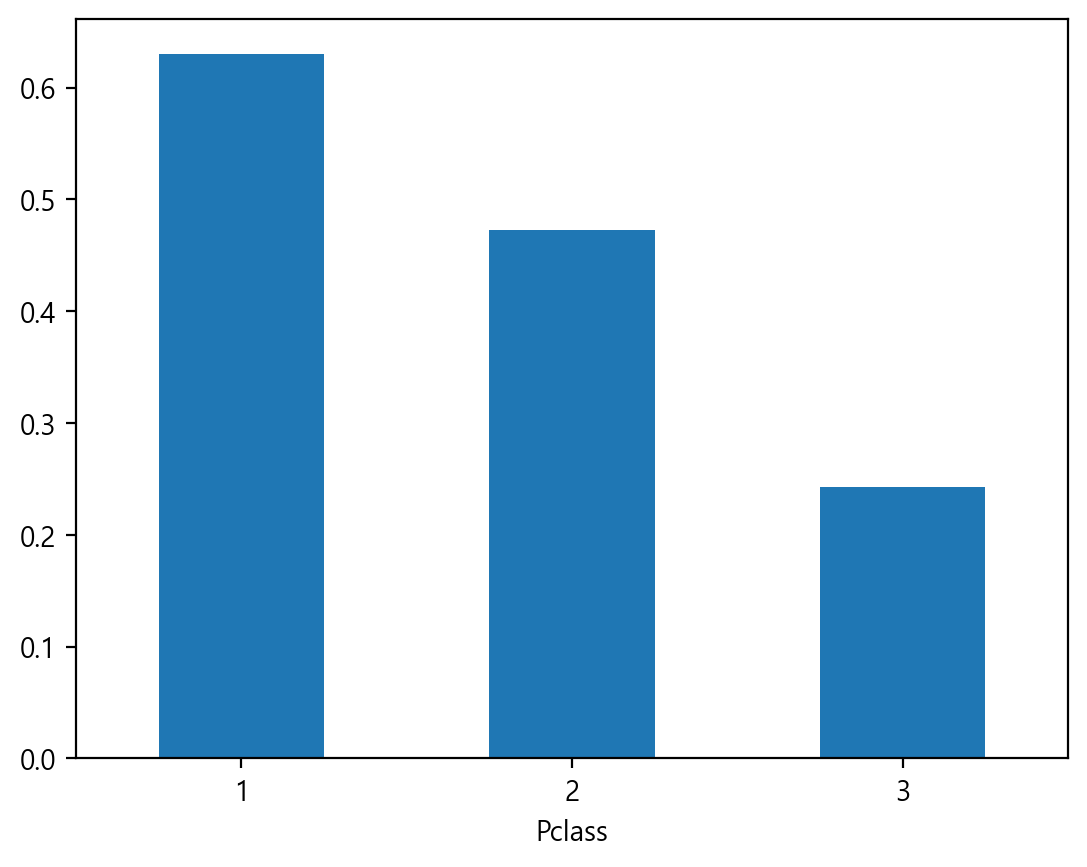

In [20]:
df.groupby('Pclass').mean(numeric_only=True)['Survived'].plot(kind = 'bar', rot = 0) # 위의 표를 시각화
plt.show()

#### **3.4 결측치 확인**

In [21]:
True == 1 

True

In [22]:
null_count = df.isnull().sum()
null_count # 결측치 개수

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

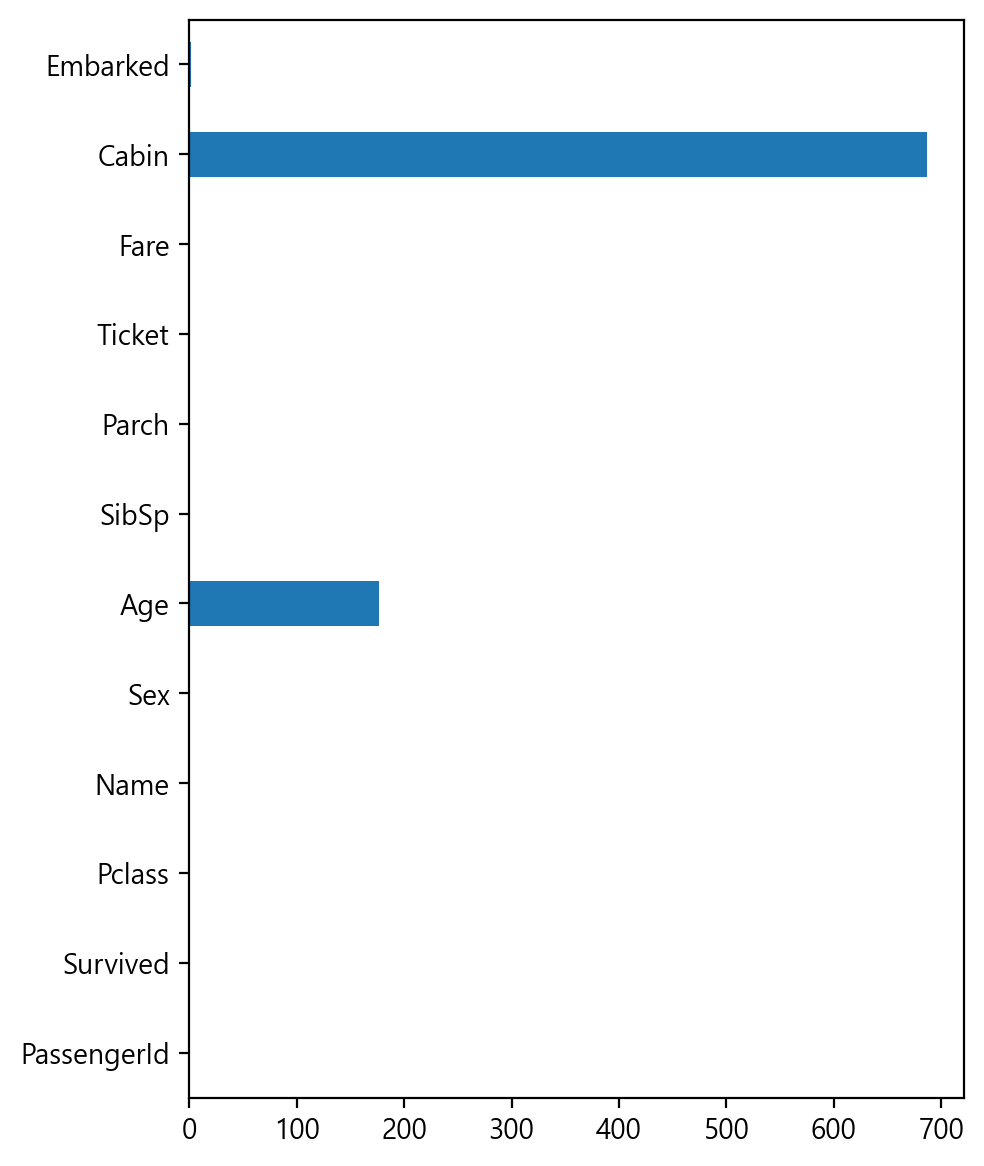

In [23]:
null_count.plot.barh(figsize=(5, 7))
plt.show() # 막대 그래프로 결측치 수 표현

In [24]:
# 위에서 계산한 결측치 수를 reset_index를 통해 데이터프레임으로 만듦.
df_null_count = null_count.reset_index()
df_null_count

,index,0
0,PassengerId,0
1,Survived,0
2,Pclass,0
3,Name,0
4,Sex,0
5,Age,177
6,SibSp,0
7,Parch,0
8,Ticket,0
9,Fare,0


In [25]:
# 컬럼명 변경
df_null_count.columns = ["컬럼명", "결측치수"]
df_null_count.head()

,컬럼명,결측치수
0,PassengerId,0
1,Survived,0
2,Pclass,0
3,Name,0
4,Sex,0


In [26]:
# df_null_count 데이터 프레임에 있는 결측치수 컬럼을 sort_values를 통해 정렬해서
# 결측치가 많은 순으로 출력
df_null_count_top = df_null_count.sort_values(by="결측치수", ascending=False).head()
df_null_count_top # Cabin: 결측치 수 매우 많음, Embarked: 결측수 거의 없음.

,컬럼명,결측치수
10,Cabin,687
5,Age,177
11,Embarked,2
0,PassengerId,0
1,Survived,0


In [27]:
# 특정 컬럼명 불러오기
df["Cabin"].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [28]:
# "컬럼명" 이라는 컬럼의 값만 가져와서 drop_columns 라는 변수에 담기
drop_columns = df_null_count_top["컬럼명"].tolist()
drop_columns

['Cabin', 'Age', 'Embarked', 'PassengerId', 'Survived']

In [29]:
# drop_columns 변수로 해당 컬럼 정보만 데이터프레임에서 가져오기
df[drop_columns].head()

,Cabin,Age,Embarked,PassengerId,Survived
0,NaN,22.0,S,1,0
1,C85,38.0,C,2,1
2,NaN,26.0,S,3,1
3,C123,35.0,S,4,1
4,NaN,35.0,S,5,0


#### **3.5 결측치 채워넣기**

##### 3.5.1 'Age' 값을 중앙값으로 채워넣기

In [30]:
df['Age'].median() # 'Age'의 중앙값 확인

28.0

In [31]:
df['Age'] = df['Age'].fillna(28) # 중앙값(28)으로 채워넣음

##### 3.5.2 'Embarked' 값을 최빈값으로 채워넣기(문자열이므로 최빈값 이용)

In [32]:
df['Embarked'].value_counts() # 최빈값 확인

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [33]:
df['Embarked'] = df['Embarked'].fillna('S') # 최빈값으로 채워넣기

In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### **3.6 결측치 제거**
- Cabin은 결측치수가 너무 많고 생존율 예측에 큰 도움을 주기 어려워서 제거

In [35]:
print(df.shape)
# Cabin만 제거
df = df.drop(columns=['Cabin']) 
print(df.shape)

(891, 12)
(891, 11)


#### **3.7 결측치 제거 후 데이터 요약**

In [36]:
# Sex 값을 문자형에서 숫자형으로 변환
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [38]:
df.info() # 데이터 요약

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB
